In [1]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
from deep_macrofin import PDEModel
from deep_macrofin import ActivationType, Comparator, EndogVar, EndogVarConditions, EndogEquation, System, Constraint

In [2]:
ode1 = PDEModel("obstacle")
ode1.set_state(["x"], {"x": [-2., 2.]})
ode1.add_endog("u")
ode1.add_constraint("u", Comparator.GEQ, "1-x**2")
ode1.add_constraint("u_xx", Comparator.LEQ, "0")
sys = System([Constraint("u", Comparator.GT, "1-x**2", "sys1_const")], label="sys1")
sys.add_endog_equation("u_xx=0")
ode1.add_system(sys)
ode1.add_endog_condition("u", 
                              "u(SV)", {"SV": torch.tensor([[-2.]])},
                              Comparator.EQ,
                              "0", {},
                              label="bc1")
ode1.add_endog_condition("u", 
                              "u(SV)", {"SV": torch.tensor([[2.]])},
                              Comparator.EQ,
                              "0", {},
                              label="bc2")
print(ode1)
if not os.path.exists("./models/obstacle/model.pt"):
    ode1.train_model("./models/obstacle", "model.pt", True)
    ode1.eval_model(True)
else:
    ode1.load_model(torch.load("./models/obstacle/model.pt"))
    ode1.eval_model(True)

===========================Summary of Model obstacle============================
Config: {
 "batch_size": 100,
 "num_epochs": 1000,
 "lr": 0.001,
 "loss_log_interval": 100,
 "optimizer_type": "AdamW",
 "sampling_method": "UniformRandom",
 "refinement_rounds": 5,
 "loss_balancing": false,
 "bernoulli_prob": 0.9999,
 "loss_balancing_temp": 0.1,
 "loss_balancing_alpha": 0.999,
 "soft_adapt_interval": -1,
 "loss_soft_attention": false
}
Latex Variable Mapping:
{}
User Defined Parameters:
{}

================================State Variables=================================
x: [-2.0, 2.0]

=====================================Agents=====================================

================================Agent Conditions================================

==============================Endogenous Variables==============================
Endogenous Variable Name: u
EndogVar(
  (model): Sequential(
    (linear_0): Linear(in_features=1, out_features=30, bias=True)
    (activation_0): Tanh()
    (linear

Min loss: 0.0002: 100%|██████████| 1000/1000 [00:11<00:00, 83.45it/s]

training finished, total time :: 12.022140264511108
Best model saved to ./models/obstacle/model_best.pt if valid
Model saved to ./models/obstacle/model.pt
===================================Evaluating===================================
loss :: constraint_1: 0.0000,
constraint_2: 0.0001,
system_sys1: 0.0004,
endogvar_u_cond_bc1: 0.0000,
endogvar_u_cond_bc2: 0.0000,
total_loss: 0.0006


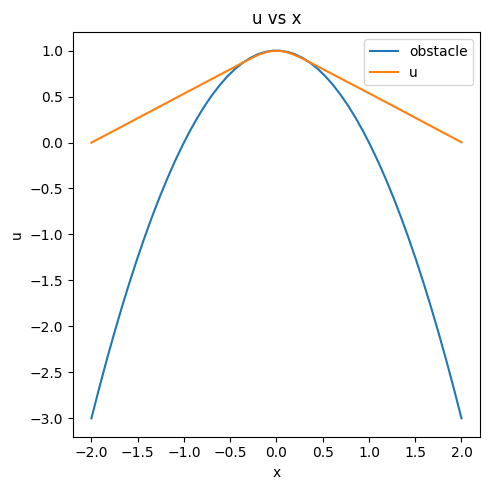

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
x = np.linspace(-2, 2)
obstacle = 1 - x**2
ax.plot(x, obstacle, label="obstacle")
ode1.endog_vars["u"].plot("u", {"x": [-2, 2]}, ax=ax)
ax.legend()
plt.tight_layout()
plt.show()